In [1]:
import matplotlib.pyplot as plt

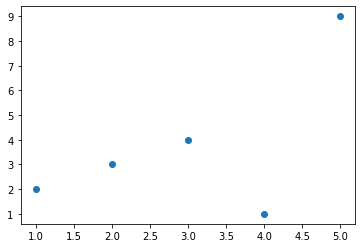

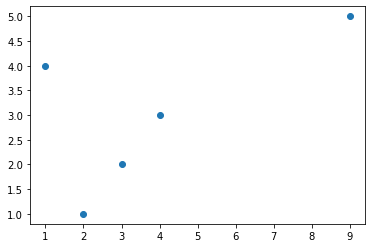

In [2]:
# animacja
x = [1,2,3,4,5]
y= [2,3,4,1,9]

plt.scatter(x,y)
plt.pause(5)

plt.scatter(y,x)

plt.show()

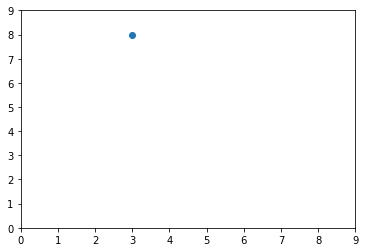

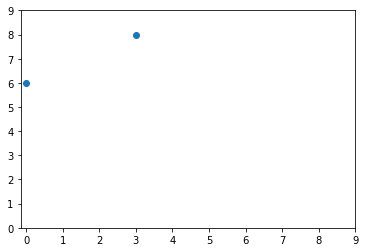

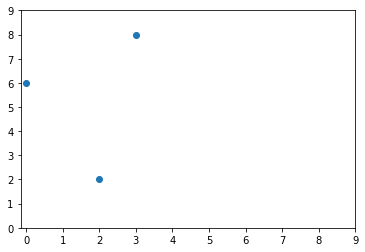

[3, 0, 2]
[8, 6, 2]


In [31]:
# zadanie 1 co sekunde losuj nowy x i nowy y i wyrysuj, 10 punktow
import random


x = list()
y = list()

for i in range(3):
    x.append(random.randrange(0, 10))
    y.append(random.randrange(0, 10))
    plt.pause(1)
    plt.scatter(x,y)
    plt.xticks(list(range(10)))
    plt.yticks(list(range(10)))

plt.show()

print(x)
print(y)


In [32]:
# spychacz ma byc w srodu
# rysujemy kilka punktow
# spychacz na srodku skierowany w gore
# robimy siatke
# pobierz od gracza G,R,l
# G- ruch do przodu, L - obrot 90 w lewo, R - 90 stopni w prawo
# komunikat wygral / przegral
# wyrysuj slad spychacza

# uzer raz wprowadza dane 


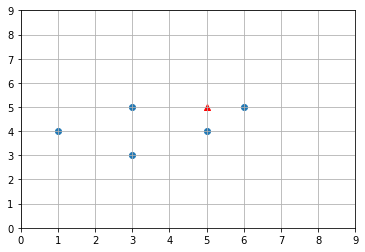

Podaj jak ma sie poruszac (G,R,L):  ggl
ggl
G
G


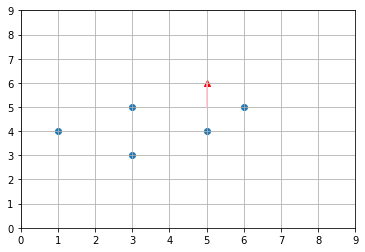

L


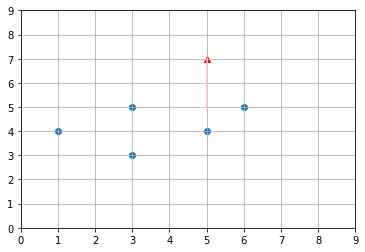

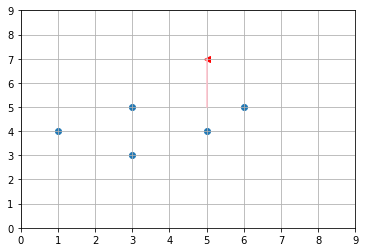

Number of colected point: 0
Przegral


In [4]:
grid = 10

x =[ random.randrange(0, 10) for x in range(5)]
y =[ random.randrange(0, 10) for x in range(5)]

s = [5,5,90, '^'] # x,y,90 stopni, symbol

symbole = {
    90: '^',
    180: '>',
    270: "v",
    360: '<'
}

xs = [s[0]]
ys = [s[1]]

droga_color = 'pink'
droga_x = list()
droga_y = list()

plt.scatter(x,y)
plt.scatter(s[0], s[1], marker='^', c='r')
plt.xticks(list(range(grid)))
plt.yticks(list(range(grid)))
plt.grid()

plt.show()

def animate():
    plt.pause(1)
    plt.scatter(x,y)
    plt.plot(xs,ys, color='pink')
    plt.scatter(s[0], s[1], marker=symbole[s[2]], c='r')
    plt.xticks(list(range(grid)))
    plt.yticks(list(range(grid)))
    plt.grid()

def move(user_input):
    for e in user_input:
        if e.upper() == 'R':
            print('R')
            if s[2] == 360:
                s[2] = 90
            else:
                s[2] = s[2] + 90
            animate()
            
        elif e.upper() == 'L':
            print('L')
            if s[2] == 90:
                s[2] = 360
            else:
                s[2] = s[2] - 90
            animate()
              
        elif e.upper() == 'G':
            # up s = [5,5,90, '^'] # x,y,0 stopni, symbol
            print('G')
            if s[2] == 90:
                s[1] = s[1] + 1
            if s[2] == 180:
                s[0] = s[0] + 1
            if s[2] == 270:
                s[1] = s[1] - 1
            if s[2] == 360:
                s[0] = s[0] - 1
            
            xs.append(s[0])
            ys.append(s[1])
            animate()
            
        else:
            continue
    
    plt.show()
        
        
user_input = input('Podaj jak ma sie poruszac (G,R,L):  ')
print(user_input)
move(user_input)


points_coordinates = list(zip(x,y))
move_coordinates = list(zip(xs,ys))
collected_points = 0
for i in move_coordinates:
    if i in points_coordinates:
        points_coordinates.remove(i)
        collected_points += 1

print('Number of colected point:' , collected_points)
if collected_points == 5:
    print('Wygral')
else:
    print('Przegral')

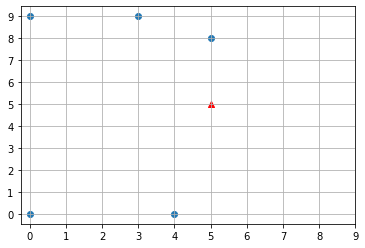

Podaj jak ma sie poruszac (G,R,L):  aaggllrrg


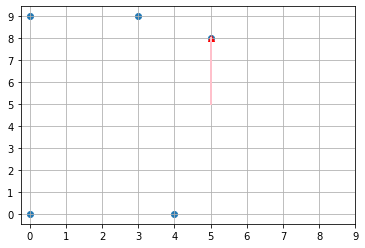

['^', '<', 'v', '<', '^']
[(5, 5), (5, 6), (5, 7), (5, 8)]
Number of colected point: 1
Przegral


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import random

grid = 10

class Points:
    def __init__(self):
        self.x = [random.randrange(0, 10) for x in range(5)]
        self.y = [random.randrange(0, 10) for x in range(5)]
        
    def return_points_coordinates(self):
        return list(zip(self.x, self.y))


class Spychacz:
    def __init__(self):
        self.x = 5
        self.y = 5
        self.a = 90
        self.symbol = '^'
        self.sx = [self.x]
        self.sy = [self.y]
        self.symbols_history = [self.symbol]
        self.symbole = { 90: '^', 180: '>', 270: "v", 360: '<'}
        
    def turn_right(self):
        if self.a == 360:
            self.a = 90
        else:
            self.a += 90
        self.symbol = self.symbole[self.a]
        self.symbols_history.append(self.symbol)
    
    def turn_left(self):
        if self.a == 90:
            self.a = 360
        else:
            self.a -= 90
        self.symbol = self.symbole[self.a]
        self.symbols_history.append(self.symbol)
            
    def step_forward(self):
        if self.a == 90:
            self.y += 1
        if self.a == 180:
            self.x += 1
        if self.a == 270:
            self.y -= 1
        if self.a == 360:
            self.x -= 1
        self.sx.append(self.x)
        self.sy.append(self.y)
        
    def return_steps_history(self):
        return list(zip(self.sx, self.sy))

            
def move(user_input):
    for e in user_input:
        if e.upper() == 'R':
            spychacz.turn_right()
        elif e.upper() == 'L':
            spychacz.turn_left()
        elif e.upper() == 'G':
            spychacz.step_forward()
        else:
            continue

def draw(points, spychacz):
    plt.scatter(points.x, points.y)
    plt.plot(spychacz.sx, spychacz.sy, color='pink', linewidth='2')
    plt.scatter(spychacz.x, spychacz.y, marker=spychacz.symbol, c='r')
    plt.xticks(list(range(grid)))
    plt.yticks(list(range(grid)))
    plt.grid()

    plt.show()

points = Points()
spychacz = Spychacz()  

draw(points, spychacz)



user_input = input('Podaj jak ma sie poruszac (G,R,L):  ')
move(user_input)   
draw(points, spychacz)

    
print(spychacz.symbols_history)
print(spychacz.return_steps_history())

points_coordinates = points.return_points_coordinates()
move_coordinates = spychacz.return_steps_history()
collected_points = 0
for i in move_coordinates:
    if i in points_coordinates:
        points_coordinates.remove(i)
        collected_points += 1

print('Number of colected point:', collected_points)
if collected_points == 5:
    print('Wygral')
else:
    print('Przegral')

In [9]:
plt.xticks([x for x in range(0,101,10)])
plt.yticks([x for x in range(0,101,10)])

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [19]:
# modulo mega ciekawe 
# right
print( (270 + 97) % 360 )
print( (270 + 90) % 360 )
print( (270 + 360) % 360 )

# left 

print( (270 - 90) % 360 )

7
0
270
0


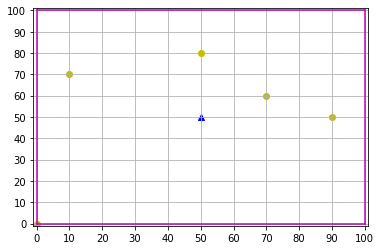

Podaj trase:gg
Przegrana


In [22]:
# od prowadzacego
import matplotlib.pyplot as plt
import numpy as np

class Spychacz():
    a = 0 # kąt

    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.droga = list()
        self.droga.append((self.x, self.y))
        self.droga.append((self.x, self.y))

    def gdzieSpychacz(self):
        return self.x, self.y

    def jedz(self, ruch):
        if ruch == 'G':
            if self.a == 0:
                self.y += 10
            elif self.a == 90:
                self.x += 10
            elif self.a == 180:
                self.y -= 10
            elif self.a == 270:
                self.x -= 10
            self.droga.append((self.x, self.y))
            if self.x > 100:
                self.x = 90
            if self.x < 0:
                self.x = 10
            if self.y > 100:
                self.y = 90
            if self.y < 0:
                self.y = 10
        elif ruch == 'R':
            self.a = (self.a + 90) % 360
        elif ruch == 'L':
            self.a = (360 + self.a - 90) % 360
        if self.a == 0:
            m = '^'
        elif self.a == 90:
            m = '>'
        elif self.a == 180:
            m = 'v'
        elif self.a == 270:
            m = '<'
        return self.x, self.y, m


class Cel:
    def __init__(self):
        self.x = np.random.randint(0,10) * 10
        self.y = np.random.randint(0,10) * 10
        self.trafiony = False

plt.axis([-1,101, -1, 101])
plt.grid(10)
plt.plot([0,0], [0,100], color='m')
plt.plot([0,100], [100,100], color='m')
plt.plot([100,100], [100,0], color='m')
plt.plot([100,0], [0,0], color='m')
plt.xticks([x for x in range(0,101,10)])
plt.yticks([x for x in range(0,101,10)])

spychacz = Spychacz(50,50)
sx, sy = spychacz.gdzieSpychacz()
plt.scatter(sx, sy, color = 'b', marker='^')

lista_celow = list()

for i in range(5):
    cel = Cel()
    plt.scatter(cel.x, cel.y, color='y', marker='o')
    lista_celow.append(cel)

plt.pause(1)
trasa = input('Podaj trase:')

licznik_trafien = 0

for ruch in trasa:
    if ruch not in ['G', 'L', 'R']:
        continue
    sx, sy, sm = spychacz.jedz(ruch)
    for cel in lista_celow:
        if sx == cel.x and sy == cel.y and not cel.trafiony:
            cel.trafiony = True
            plt.scatter(cel.x, cel.y, color = 'r', marker='x')
            licznik_trafien+= 1
    plt.scatter(sx, sy, color = 'b', marker=sm)
    plt.plot((spychacz.droga[-1][0], spychacz.droga[-2][0]), (spychacz.droga[-1][1], spychacz.droga[-2][1]))
    print(f'Ilosc trafien: {licznik_trafien}')
    plt.pause(0.5)


if licznik_trafien > 4:
    print('Wygrana')
else:
    print('Przegrana')

plt.show()

In [24]:
# zadanie 1
# mamy spychacz i losowe punkty
# wiemy gdzie punkty i spychycz 
# okresl najkrotsza mozliwa sciezke tak zeby zebrac wszystkie punkty i wypisz rozwiazanie -- wypisz stringa koment 
# e.g. rgggrgglgglg...

In [25]:
# zadanie 2
# element nie moze byc przy scianie 
# zrobic kontener na mapie i wepchnac wszystkie kule do kontenera
# wpychamy tylko jedna kule do kontenera
# mozemy pchac tylko jedna kule 
# element nie moze pojawic sie na krawedzi
# nie dopchnac kuli do krawedzi bo wtedy nie wygramy
# jak cztery kule tworza kwadrat wtedy nie da sie wygrac
# zrob tak aby kule nie spalnowaly sie na tym samym miejscu

In [29]:
# number of pairs with 4 unique items
n = 4
(n*(n-1))/2

6.0